In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/Apple.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date       Open       High        Low      Close  Adj Close  \
0  2018-12-12  42.599998  42.980000  42.255001  42.275002  40.576008   
1  2018-12-13  42.622501  43.142502  42.387501  42.737499  41.019917   
2  2018-12-14  42.250000  42.270000  41.320000  41.369999  39.707371   
3  2018-12-17  41.362499  42.087502  40.682499  40.985001  39.337845   
4  2018-12-18  41.345001  41.882500  41.097500  41.517502  39.848946   

      Volume  
0  142510800  
1  127594400  
2  162814800  
3  177151600  
4  135366000  


In [15]:
# 2.  chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 0.1, 'gamma': 'scale'}
Best score: 3.9344214842072534


In [17]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([144.4414278 , 143.393409  , 148.73214463, 145.50674753,
       140.73708879, 136.61676347, 134.16335453, 132.20129871,
       135.77722743, 133.52021771, 131.36411783, 130.34406311,
       129.9599542 , 129.40375373, 128.86753825, 129.82851035,
       127.56170981, 126.66047942, 129.21154719, 132.3625586 ,
       130.19245285, 132.46331213, 133.2184565 , 133.882088  ,
       136.25717733, 137.57402105, 135.21656819, 136.98599972,
       142.23471555, 142.07734427, 141.35852504, 143.14819146,
       146.06305047, 144.4218563 , 143.23648205, 145.45792148,
       149.90961617, 155.96674598, 151.7791615 , 153.85833048,
       153.22301889, 152.97887981, 150.06533019, 152.91053373,
       152.43239254, 154.12249223, 154.93558767, 151.6817066 ,
       150.02640849, 148.71267693, 149.09220317, 146.02403264,
       147.95346155, 147.86584245, 146.06305047, 145.55556958,
       149.8415026 , 154.90617038, 152.68605227, 152.13982341,
       153.18394029, 149.67607043, 151.81813755, 152.07

In [18]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[193.179993]])

In [19]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([185.7555581]),
 array([182.55428606]),
 array([180.26865551]),
 array([178.39661749]),
 array([176.74715809]),
 array([175.22535804]),
 array([173.77665087]),
 array([172.36677747]),
 array([170.97318379]),
 array([169.58091165]),
 array([168.18049035]),
 array([166.76677423]),
 array([165.33821315]),
 array([163.89627853]),
 array([162.44489235]),
 array([160.98979082]),
 array([159.5378204]),
 array([158.09621332]),
 array([156.67191503]),
 array([155.27103539]),
 array([153.89847171]),
 array([152.55771689]),
 array([151.25083406]),
 array([149.97855734]),
 array([148.74047155]),
 array([147.53522743]),
 array([146.36075952]),
 array([145.21448526]),
 array([144.09347485]),
 array([142.99458847])]

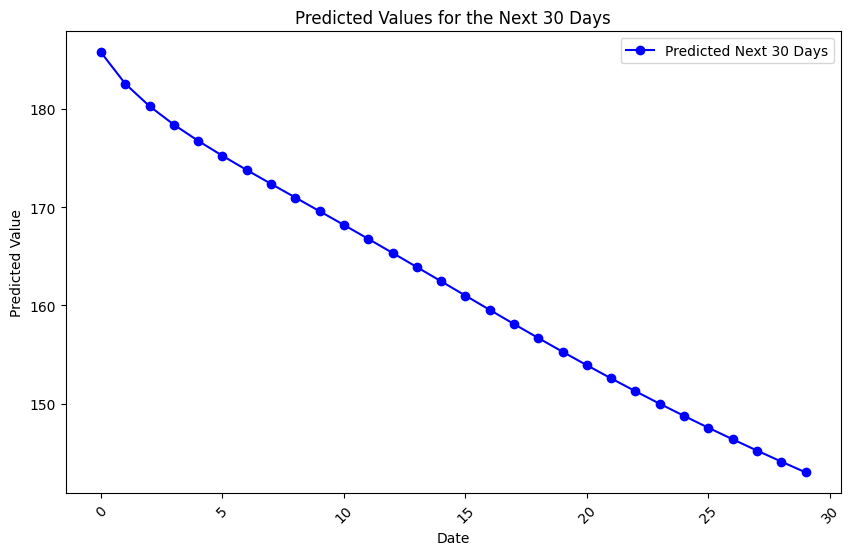

In [20]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [21]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [22]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    3.078327
dtype: float64
Testing MAPE: 0.011832098340762142
Testing MAE: 2.1044043615092627


In [23]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    3.078327
dtype: float64
Testing MAPE: 0.011832098340762142
Testing MAE: 2.1044043615092627


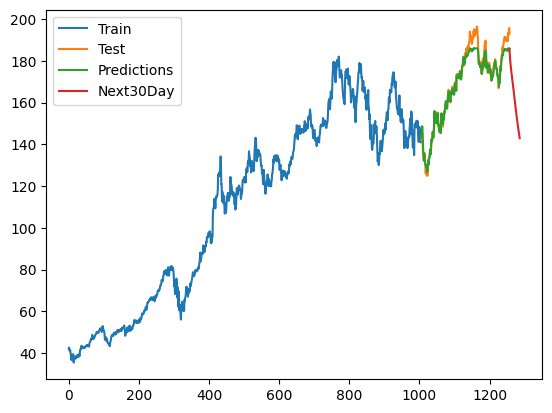

In [24]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()